In [ ]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=e7958ee334c7d3a31b69cede994208c007ffb0178ea06751c47493ffbdda0323
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
import wget
import os
from urllib.error import ContentTooShortError
!gdown 12UkPZy6dkduKPbY6DBSdco-gR2l5Asxc
urls = [
    "https://engineering.case.edu/sites/default/files/107.mat",
    "https://engineering.case.edu/sites/default/files/120.mat",
    "https://engineering.case.edu/sites/default/files/132.mat"
]

def download_with_retry(url, retries=3):
    for attempt in range(retries):
        try:
            filename = wget.download(url)
            return filename
        except ContentTooShortError as e:
            print(f"Error downloading {url}: {e}")
            print(f"Retrying {attempt + 1}/{retries}...")
            # Optionally, remove the partially downloaded file before retrying
            if 'filename' in locals() and os.path.exists(filename):
                os.remove(filename)
    raise Exception(f"Failed to download {url} after {retries} attempts")

for url in urls:
    try:
        filename = download_with_retry(url)
        print(f"Downloaded {filename} successfully.")
    except Exception as e:
        print(e)


Downloading...
From (original): https://drive.google.com/uc?id=12UkPZy6dkduKPbY6DBSdco-gR2l5Asxc
From (redirected): https://drive.google.com/uc?id=12UkPZy6dkduKPbY6DBSdco-gR2l5Asxc&confirm=t&uuid=d344c1c4-a88b-4f0f-b100-f6d29cdb44a5
To: /content/99.mat
100% 15.5M/15.5M [00:00<00:00, 56.2MB/s]
Downloaded 107.mat successfully.
Error downloading https://engineering.case.edu/sites/default/files/120.mat: <urlopen error retrieval incomplete: got only 2335660 out of 2917752 bytes>
Retrying 1/3...
Downloaded 120.mat successfully.
Downloaded 132.mat successfully.


In [ ]:
import pandas as pd
import scipy.io as scio
import numpy as np

mat = scio.loadmat('99.mat')
variables = scio.whosmat('99.mat')

data1 = mat['X098_DE_time']
data2 = mat['X098_FE_time']

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

normal=[]

for i in range(700):
    a=np.concatenate([df1.values[i*200:200+i*200], df2.values[i*200:200+i*200]])
    a=np.reshape(a,(200,2))
    normal.append(a)


normal=np.squeeze(normal)
normal.shape

(700, 200, 2)

In [ ]:
mat = scio.loadmat('107.mat')
variables = scio.whosmat('107.mat')

data1 = mat['X107_DE_time']
data2 = mat['X107_FE_time']

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

f1=[]

for i in range(600):
    a=np.concatenate([df1.values[i*200:200+i*200], df2.values[i*200:200+i*200]])
    a=np.reshape(a,(200,2))
    f1.append(a)


f1=np.squeeze(f1)
f1.shape

(600, 200, 2)

In [ ]:
mat = scio.loadmat('120.mat')
variables = scio.whosmat('120.mat')

data1 = mat['X120_DE_time']
data2 = mat['X120_FE_time']

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

f2=[]

for i in range(600):
    a=np.concatenate([df1.values[i*200:200+i*200], df2.values[i*200:200+i*200]])
    a=np.reshape(a,(200,2))
    f2.append(a)


f2=np.squeeze(f2)
f2.shape

(600, 200, 2)

In [ ]:
mat = scio.loadmat('132.mat')
variables = scio.whosmat('132.mat')
# print(variables)
data1 = mat['X132_DE_time']
data2 = mat['X132_FE_time']

df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

f3=[]

for i in range(600):
    a=np.concatenate([df1.values[i*200:200+i*200], df2.values[i*200:200+i*200]])
    a=np.reshape(a,(200,2))
    f3.append(a)


f3=np.squeeze(f3)
f3.shape

(600, 200, 2)

In [ ]:
X = np.concatenate((normal, f1, f2, f3))
y = np.concatenate((np.zeros(len(normal)), np.ones(len(f1)), 2*np.ones(len(f2)), 3*np.ones(len(f3))))

In [ ]:
X.shape[0]

2500

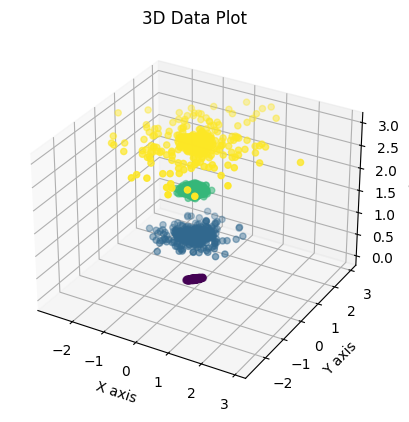

In [ ]:
X_reshaped = X.reshape((X.shape[0], -1))

import matplotlib.pyplot as plt

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(X_reshaped[:, 0], X_reshaped[:, 1], y,c=y)

# Set labels and title
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Label')
ax.set_title('3D Data Plot')

# Show the plot
plt.show()

# Extracting Features

In [ ]:
std_X= X.std(axis=1)
peak_X= X.max(axis=1)

from scipy.stats import skew, kurtosis
skewness_X= skew(X, axis=1)
kurtosis_X= kurtosis(X, axis=1)

crest_factor_X = np.max(X, axis=1) / np.sqrt(np.mean(X**2, axis=1))
ptp_X= np.ptp(X, axis=1)
mean_X= np.mean(X, axis=1)
rms_X = np.sqrt(np.mean(X**2, axis=1))
abs_mean_X= np.mean(np.abs(X), axis=1)

In [ ]:
X_new=np.concatenate([std_X, peak_X, skewness_X, kurtosis_X, crest_factor_X, ptp_X, mean_X, rms_X, abs_mean_X],axis=1)

In [ ]:
X_new.shape

(2500, 18)

In [ ]:
data= pd.DataFrame(X_new,columns=['std_0','std_1','peak_0','peak_1', 'skewness_0', 'skewness_1', 'kurtosis_0', 'kurtosis_1', 'crest_factor_0', 'crest_factor_1','ptp_0', 'ptp_1', 'mean_0', 'mean_1', 'rms_0', 'rms_1', 'abs_mean_0', 'abs_mean_1'])

In [ ]:
data.head()

,std_0,std_1,peak_0,peak_1,skewness_0,skewness_1,kurtosis_0,kurtosis_1,crest_factor_0,crest_factor_1,ptp_0,ptp_1,mean_0,mean_1,rms_0,rms_1,abs_mean_0,abs_mean_1
0,0.060663,0.060877,0.180800,0.171965,-0.365262,-0.337173,0.646471,0.463768,2.937679,2.785655,0.379610,0.362849,0.010385,0.010239,0.061545,0.061733,0.048017,0.048524
1,0.068410,0.068715,0.229082,0.206482,-0.059702,-0.102322,-0.008675,-0.046899,3.122650,2.798256,0.376573,0.366490,0.026496,0.026890,0.073361,0.073789,0.059287,0.059192
2,0.072933,0.072956,0.200318,0.213262,-0.098350,-0.092432,-0.316778,-0.261666,2.678186,2.853226,0.372217,0.388082,0.016593,0.016249,0.074796,0.074744,0.059930,0.059926
3,0.070353,0.070375,0.241204,0.223535,0.034709,-0.032924,0.196209,0.010201,3.166207,2.929587,0.438762,0.394808,0.029221,0.029486,0.076181,0.076302,0.060834,0.061052
4,0.058739,0.059006,0.185525,0.171349,-0.010071,0.030679,0.139992,0.065996,3.066759,2.823319,0.338232,0.320926,0.014474,0.014199,0.060496,0.060691,0.047044,0.047844


# Shuffling and Normalization

In [ ]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(data.values, y, test_size=0.2, random_state=14) #shuffling is always true
X_train, X_valid, y_train, y_valid = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=14)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)
X_valid_normalized = scaler.transform(X_valid)

In [ ]:
# Checking the scaling result
print("Feature range after scaling:")
print(f"Train data: min = {X_train_normalized.min(axis=0)}, max = {X_train_normalized.max(axis=0)}")
print(f"Validation data: min = {X_valid_normalized.min(axis=0)}, max = {X_valid_normalized.max(axis=0)}")
print(f"Test data: min = {X_test_normalized.min(axis=0)}, max = {X_test_normalized.max(axis=0)}")

Feature range after scaling:
Train data: min = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], max = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Validation data: min = [-0.00090978 -0.00104988  0.00384916 -0.00356131  0.01243251  0.05532782
  0.00764462  0.00686927  0.00918584 -0.00482046  0.00712586  0.00096042
  0.04882716  0.06149041  0.00265207  0.00215688 -0.00140223 -0.00159335], max = [0.96770557 1.07714489 1.00690355 1.07112382 0.73294352 1.00095288
 0.76208363 0.86020344 1.03132835 0.8781138  1.02562765 1.06104613
 1.0215507  1.0178764  0.96777971 1.0771694  0.94456755 1.06358412]
Test data: min = [ 3.20294004e-03  3.36102773e-03  2.56610500e-03  1.80576917e-03
 -1.67348756e-02  7.63836191e-02  1.86806184e-03  5.29958626e-03
  2.30047272e-02  2.88435674e-02  5.03649149e-03  6.42060963e-04
 -1.14414754e-03  8.54439490e-03  3.44775232e-03  2.36335644e-03
  9.12313583e-05  3.10516733e-04], max = [0.93384843 1.01159874 0.99971822 1.00351953 0.74009333 1.145676

# MLP

In [ ]:
from keras.callbacks import Callback
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Flatten, Dropout

num_classes = 4
input_shape= X_train_normalized[0].shape

# Create the model
model = Sequential()
model.add(Dense(24, activation='relu', input_shape=input_shape))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# Define the optimizer and compile the model
import keras
opt = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history= model.fit(X_train_normalized, y_train , batch_size=64, epochs=150, validation_data=(X_valid_normalized, y_valid))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                456       
                                                                 
 dense_1 (Dense)             (None, 16)                400       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
Total params: 1028 (4.02 KB)
Trainable params: 1028 (4.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/150
24/24 [==============================] - 7s 72ms/step - loss: 1.3499 - accuracy: 0.2807 - val_loss: 1.3298 - val_accuracy: 0.2440
Epoch 2/150
24

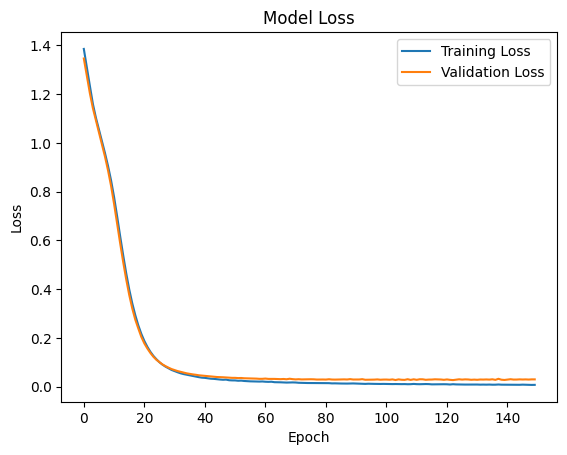

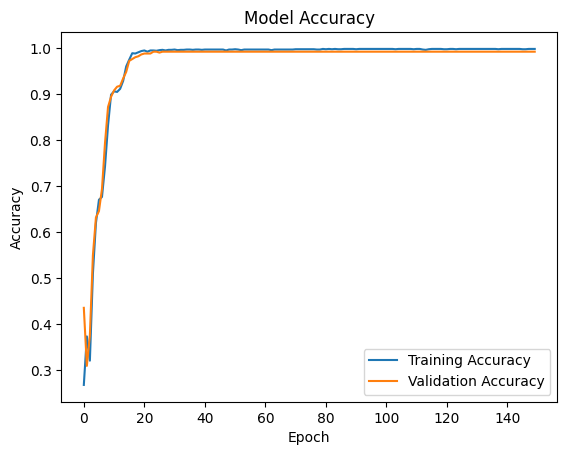

8/8 [==============================] - 0s 5ms/step - loss: 0.0216 - accuracy: 0.9960
Test loss: 0.021598493680357933
Test accuracy: 0.9959999918937683


In [ ]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss, accuracy = model.evaluate(X_test_normalized, y_test, batch_size=64)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


In [ ]:
from keras.utils import to_categorical
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, classification_report, confusion_matrix

# Assuming 'model' is your trained model and 'X_test', 'y_test' are your test datasets
y_pred = model.predict(X_test_normalized)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(to_categorical(y_test, 4), axis=1)

# Print classification report
print(classification_report(y_test_classes, y_pred_classes, target_names=['Normal', 'Fault 1', 'Fault 2', 'Fault 3']))

# Additional metrics
auc_score = roc_auc_score(to_categorical(y_test_classes, 4), to_categorical(y_pred_classes, 4), multi_class='ovr')
recall = recall_score(y_test_classes, y_pred_classes, average='micro')
f1 = f1_score(y_test_classes, y_pred_classes, average='micro')
precision = precision_score(y_test_classes, y_pred_classes, average='micro')

print('Test AUC:', auc_score)
print('Test Recall:', recall)
print('Test F1-score:', f1)
print('Test Precision:', precision)

16/16 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       155
     Fault 1       0.98      1.00      0.99       108
     Fault 2       1.00      1.00      1.00       111
     Fault 3       1.00      0.98      0.99       126

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

Test AUC: 0.9973781179138322
Test Recall: 0.996
Test F1-score: 0.996
Test Precision: 0.996


Confusion Matrix:


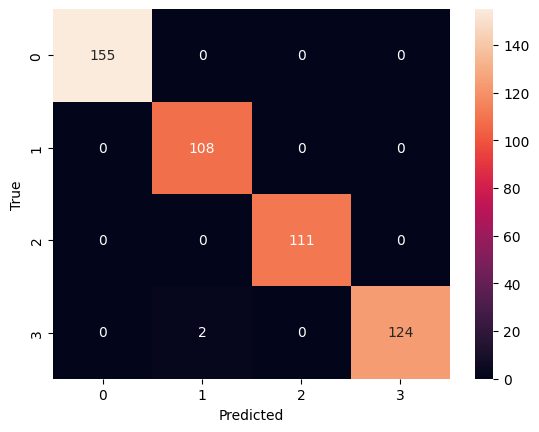

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:")
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Another set of optimizer and loss function

In [ ]:
from keras.callbacks import Callback
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Flatten, Dropout
from keras.optimizers import RMSprop

num_classes = 4
input_shape = X_train_normalized[0].shape

# One-hot encode y_train and y_valid
y_train_categorical = keras.utils.to_categorical(y_train, num_classes)
y_valid_categorical = keras.utils.to_categorical(y_valid, num_classes)
y_test_categorical = keras.utils.to_categorical(y_test, num_classes)

# Create the model
model = Sequential()
model.add(Dense(24, activation='relu', input_shape=input_shape))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

# Define the optimizer and compile the model with mean_squared_error loss
opt = RMSprop(learning_rate=0.0005)
model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])

# Train the model
history = model.fit(X_train_normalized, y_train_categorical, batch_size=64, epochs=150, validation_data=(X_valid_normalized, y_valid_categorical))


Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_169 (Dense)           (None, 24)                456       
                                                                 
 dense_170 (Dense)           (None, 16)                400       
                                                                 
 dense_171 (Dense)           (None, 8)                 136       
                                                                 
 dense_172 (Dense)           (None, 4)                 36        
                                                                 
Total params: 1028 (4.02 KB)
Trainable params: 1028 (4.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/150
24/24 [==============================] - 2s 24ms/step - loss: 0.1882 - accuracy: 0.2927 - val_loss: 0.1865 - val_accuracy: 0.3660
Epoch 2/150

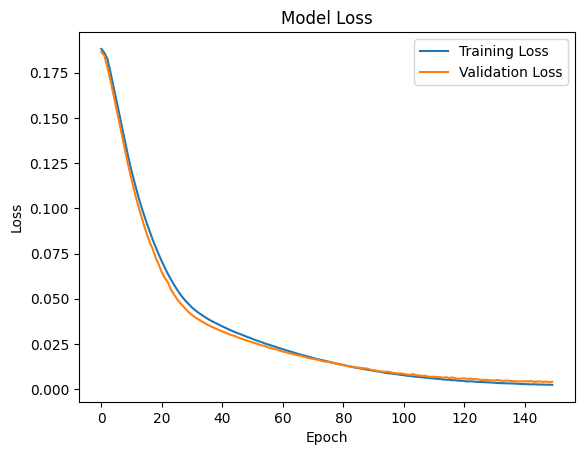

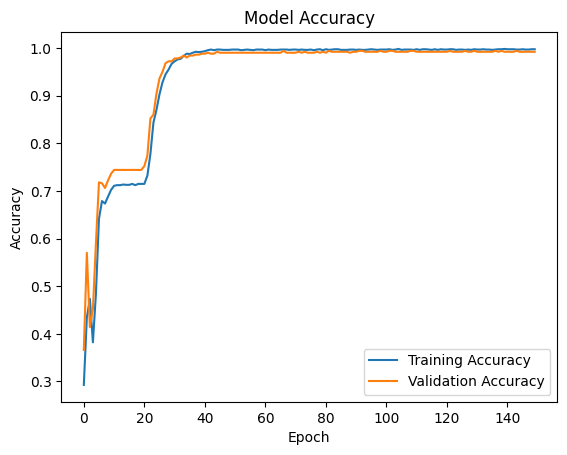

8/8 [==============================] - 0s 5ms/step - loss: 0.0032 - accuracy: 0.9960
Test loss: 0.003183630295097828
Test accuracy: 0.9959999918937683


In [ ]:
# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

loss, accuracy = model.evaluate(X_test_normalized, y_test_categorical, batch_size=64)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


In [ ]:
from keras.utils import to_categorical
from sklearn.metrics import roc_auc_score, recall_score, f1_score, precision_score, classification_report, confusion_matrix
import numpy as np

y_pred = model.predict(X_test_normalized)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_categorical, axis=1)

# Print classification report
print(classification_report(y_test_classes, y_pred_classes, target_names=['Normal', 'Fault 1', 'Fault 2', 'Fault 3']))

# Additional metrics
auc_score = roc_auc_score(to_categorical(y_test_classes, 4), to_categorical(y_pred_classes, 4), multi_class='ovr')
recall = recall_score(y_test_classes, y_pred_classes, average='micro')
f1 = f1_score(y_test_classes, y_pred_classes, average='micro')
precision = precision_score(y_test_classes, y_pred_classes, average='micro')

print('Test AUC:', auc_score)
print('Test Recall:', recall)
print('Test F1-score:', f1)
print('Test Precision:', precision)


16/16 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00       155
     Fault 1       0.98      1.00      0.99       108
     Fault 2       1.00      1.00      1.00       111
     Fault 3       1.00      0.98      0.99       126

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500

Test AUC: 0.9973781179138322
Test Recall: 0.996
Test F1-score: 0.996
Test Precision: 0.996


Confusion Matrix:


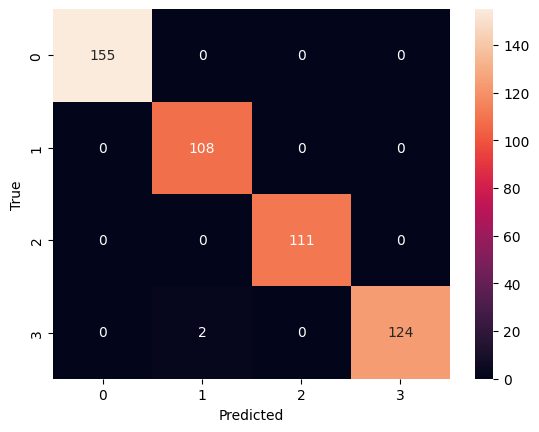

In [ ]:
import seaborn as sns

cm = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:")
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Stratified K-Fold

In [ ]:
from sklearn.model_selection import StratifiedKFold

# Define the number of folds for cross-validation
n_folds = 5

# Convert labels to categorical if needed
y_categorical = to_categorical(y)

# Initialize lists to store evaluation results
losses = []
accuracies = []
valid_losses = []
valid_accuracies = []
auc_scores = []
recall_scores = []
f1_scores = []
precision_scores = []
confusion_matrices = []

# Perform K-fold cross-validation
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=14)
for train_index, test_index in skf.split(X_new, y):
    x_train, x_test = X_new[train_index], X_new[test_index]
    y_train, y_test = y_categorical[train_index], y_categorical[test_index]

    # Define the input shape and number of classes
    input_shape = x_train.shape[1]
    num_classes = y_categorical.shape[1]

    # Create the model
    model = Sequential()
    model.add(Dense(24, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.summary()

    # Define the optimizer and compile the model
    import keras
    opt = keras.optimizers.Adam(learning_rate=0.005)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

    # Define the callback for storing loss and accuracy history
    class LossAccuracyCallback(Callback):
        def on_train_begin(self, logs={}):
            self.losses = []
            self.accs = []
            self.valid_losses = []
            self.valid_accs = []

        def on_epoch_end(self, epoch, logs={}):
            self.losses.append(logs.get('loss'))
            self.accs.append(logs.get('accuracy'))
            self.valid_losses.append(logs.get('val_loss'))
            self.valid_accs.append(logs.get('val_accuracy'))

    callback = LossAccuracyCallback()

    # Train the model with callback
    history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test), callbacks=[callback])

    # Evaluate the model on test data
    loss, accuracy = model.evaluate(x_test, y_test)
    losses.append(loss)
    accuracies.append(accuracy)

    # Predict probabilities for calculating AUC score
    y_pred_prob = model.predict(x_test)
    y_pred = np.argmax(y_pred_prob, axis=1)
    y_true = np.argmax(y_test, axis=1)
    auc_scores.append(roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='macro'))
    recall_scores.append(recall_score(y_true, y_pred, average='macro'))
    f1_scores.append(f1_score(y_true, y_pred, average='macro'))
    precision_scores.append(precision_score(y_true, y_pred, average='macro'))
    confusion_matrices.append(confusion_matrix(y_true, y_pred))


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 24)                456       
                                                                 
 dense_33 (Dense)            (None, 16)                400       
                                                                 
 dense_34 (Dense)            (None, 8)                 136       
                                                                 
 dense_35 (Dense)            (None, 4)                 36        
                                                                 
Total params: 1028 (4.02 KB)
Trainable params: 1028 (4.02 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
32/32 [==============================] - 4s 40ms/step - loss: 0.9465 - accuracy: 0.5385 - val_loss: 0.5513 - val_accuracy: 0.8320
Epoch 2/10
32

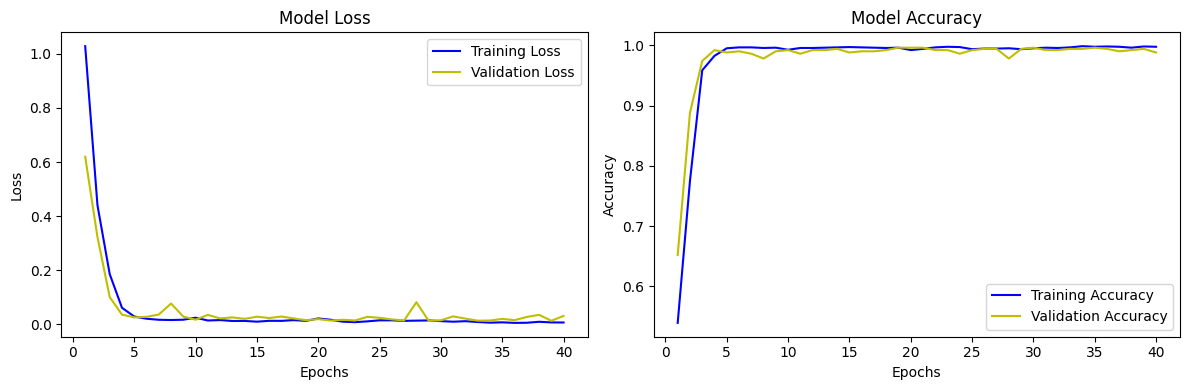

In [ ]:
import matplotlib.pyplot as plt
# Plot model loss and validation loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(callback.losses) + 1), callback.losses, 'b-', label='Training Loss')
plt.plot(range(1, len(callback.valid_losses) + 1), callback.valid_losses, 'y-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend()

# Plot model accuracy and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(callback.accs) + 1), callback.accs, 'b-', label='Training Accuracy')
plt.plot(range(1, len(callback.valid_accs) + 1), callback.valid_accs, 'y-', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Average loss: 0.016832860372960567
Average accuracy: 0.9944000005722046
Average AUC score: 0.9998114035087718
Average recall score: 0.9943452380952381
Average F1 score: 0.9943154688332368
Average precision score: 0.9943366396111424

Average confusion matrix:


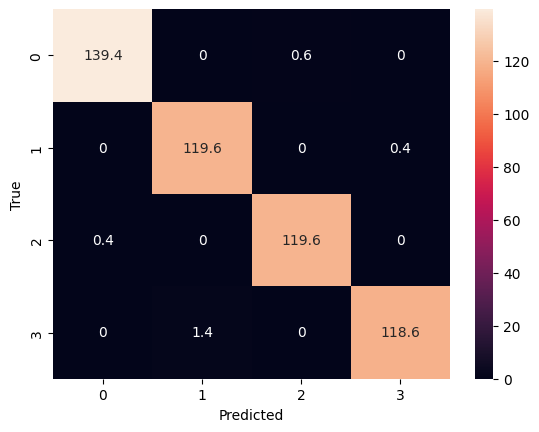

In [ ]:
# Print the average results across all folds
print("Average loss:", np.mean(losses))
print("Average accuracy:", np.mean(accuracies))
print("Average AUC score:", np.mean(auc_scores))
print("Average recall score:", np.mean(recall_scores))
print("Average F1 score:", np.mean(f1_scores))
print("Average precision score:", np.mean(precision_scores))
print("\nAverage confusion matrix:")

import seaborn as sns
sns.heatmap(np.mean(confusion_matrices, axis=0), annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()